# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

    # Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | alto araguaia
Processing Record 3 of Set 1 | marsa alam
Processing Record 4 of Set 1 | tieli
Processing Record 5 of Set 1 | la'ie
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | cockburn town
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | papatowai

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [29]:
# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Windspeed     562
Country       562
Date          562
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,puerto ayora,-0.7393,-90.3518,23.98,90,58,3.58,EC,1722980481
1,alto araguaia,-17.3147,-53.2153,23.29,30,0,2.69,BR,1722980482
2,marsa alam,25.0757,34.8918,31.62,47,4,0.49,EG,1722980483
3,tieli,46.9500,128.0500,21.35,93,100,1.27,CN,1722980484
4,la'ie,21.6477,-157.9253,30.00,71,8,4.92,US,1722980486


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.98,90,58,3.58,EC,1722980481
1,alto araguaia,-17.3147,-53.2153,23.29,30,0,2.69,BR,1722980482
2,marsa alam,25.0757,34.8918,31.62,47,4,0.49,EG,1722980483
3,tieli,46.9500,128.0500,21.35,93,100,1.27,CN,1722980484
4,la'ie,21.6477,-157.9253,30.00,71,8,4.92,US,1722980486


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [33]:
#Extract the columns needed from the dataframe for the plots
plot_lat = city_data_df["Lat"]
plot_max_temp = city_data_df["Max Temp"]
plot_humidity = city_data_df["Humidity"]
plot_cloudiness = city_data_df["Cloudiness"]
plot_wind_speed = city_data_df["Windspeed"]

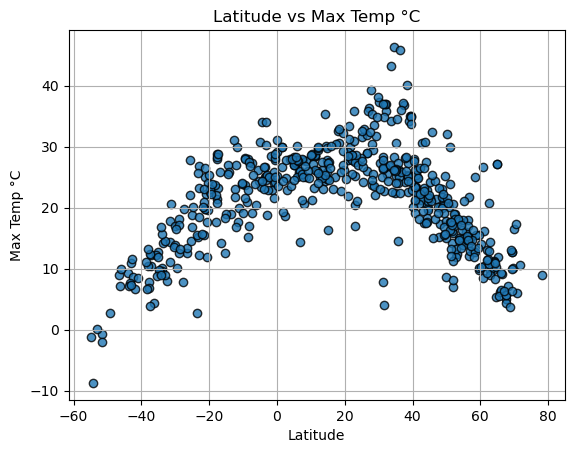

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(plot_lat,
            plot_max_temp,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp °C")
plt.ylabel("Max Temp °C")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

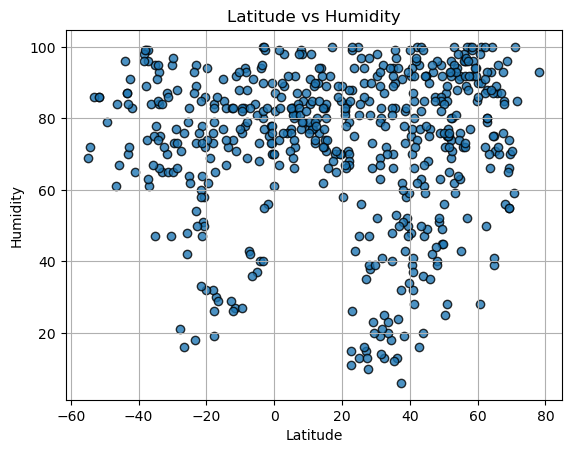

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(plot_lat,
            plot_humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

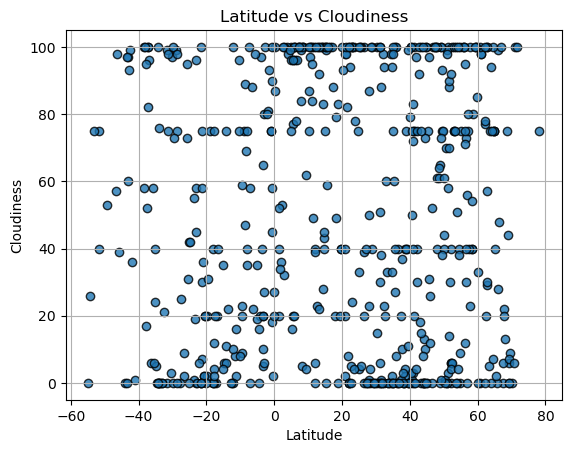

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(plot_lat,
            plot_cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

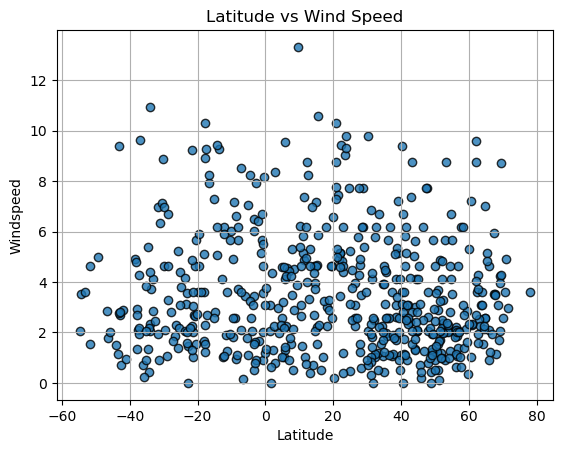

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(plot_lat,
            plot_wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot features
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r^2-value is: {rvalue}")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,marsa alam,25.0757,34.8918,31.62,47,4,0.49,EG,1722980483
3,tieli,46.9500,128.0500,21.35,93,100,1.27,CN,1722980484
4,la'ie,21.6477,-157.9253,30.00,71,8,4.92,US,1722980486
5,stanley,54.8680,-1.6985,14.33,76,0,4.12,GB,1722980487
6,cockburn town,21.4612,-71.1419,28.18,84,82,7.45,TC,1722980488


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.98,90,58,3.58,EC,1722980481
1,alto araguaia,-17.3147,-53.2153,23.29,30,0,2.69,BR,1722980482
7,waitangi,-43.9535,-176.5597,9.34,96,0,1.52,NZ,1722980489
8,edinburgh of the seven seas,-37.0676,-12.3116,10.37,61,96,9.64,SH,1722980490
10,hithadhoo,-0.6000,73.0833,27.74,73,18,0.91,MV,1722980492


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6524871122357367


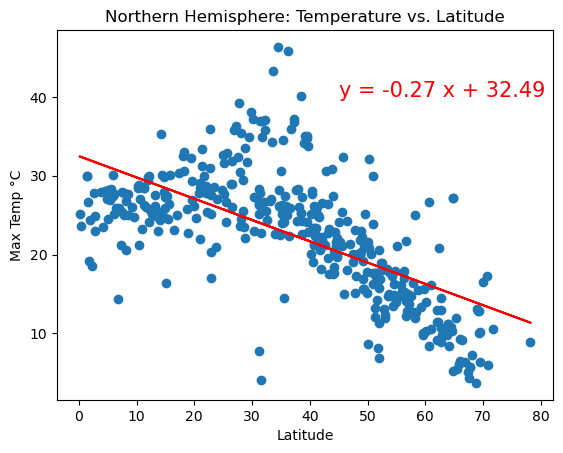

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.title(f"Northern Hemisphere: Temperature vs. Latitude")
plt.ylabel("Max Temp °C")

plot_linear_regression(x_values,y_values, 'Latitude', (45,40))

The r^2-value is: 0.8444402164233229


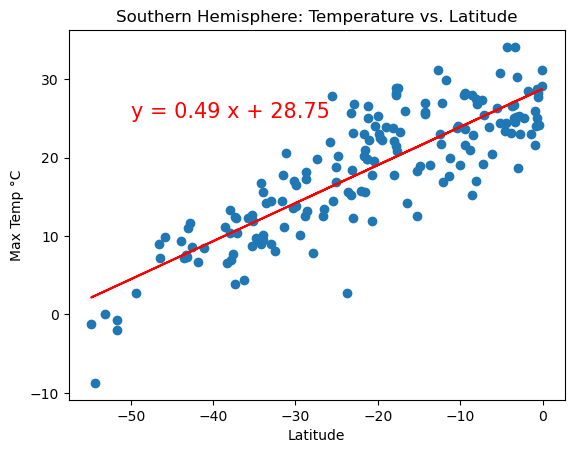

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.title(f"Southern Hemisphere: Temperature vs. Latitude")
plt.ylabel("Max Temp °C")

plot_linear_regression(x_values,y_values, 'Latitude', (-50,25))

**Discussion about the linear relationship:** The linear regression model for the Northern Hemisphere indicates that there is a strong, negative correlation between latitude and temperature, meaning temperature decreases as distance from the equator increases. The linear regression model for the Southern Hemisphere indicates that there is a strong, positive correlation between latitude and temperature, meaning temperature increases as distance to the equator decreases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.006100824891057851


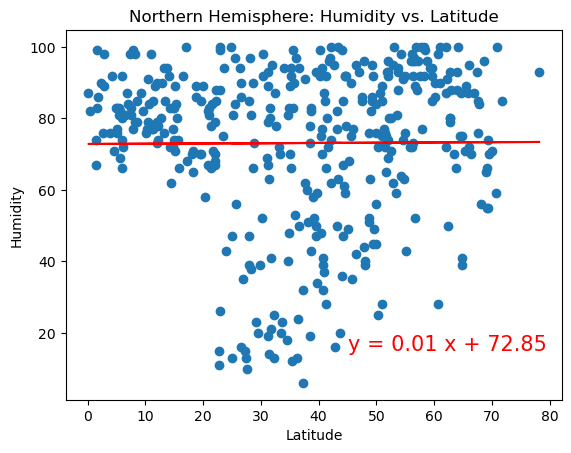

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.title(f"Northern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")

plot_linear_regression(x_values,y_values, 'Latitude', (45,15))

The r^2-value is: -0.12693560169986187


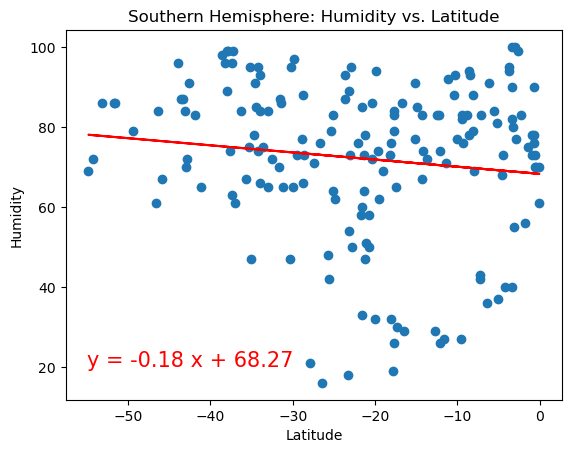

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.title(f"Southern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")

plot_linear_regression(x_values,y_values, 'Latitude', (-55,20))

**Discussion about the linear relationship:** The linear regression models for both the Northern and Southern Hemispheres indicate that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.16906477491947036


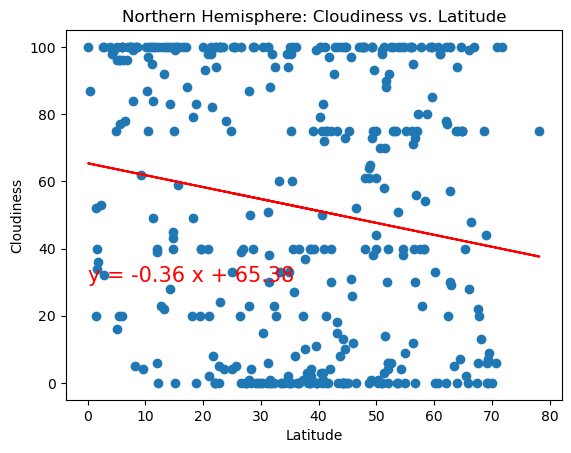

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.title(f"Northern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")

plot_linear_regression(x_values,y_values, 'Latitude', (0,30))

The r^2-value is: -0.06295966001512893


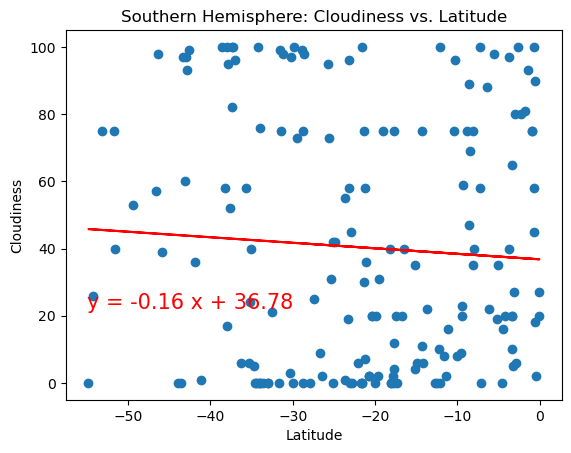

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.title(f"Southern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")

plot_linear_regression(x_values,y_values, 'Latitude', (-55,22))

**Discussion about the linear relationship:** The linear regression model for the Northern Hemisphere indicates that there is a very weak, negative correlation between latitude and cloudiness. The linear regression model for the Southern Hemisphere indicates that there is a slightly stronger negative correlation between latitude and cloudiness, meaning cloudiness may decrease as distance to the equator decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.14673119284062522


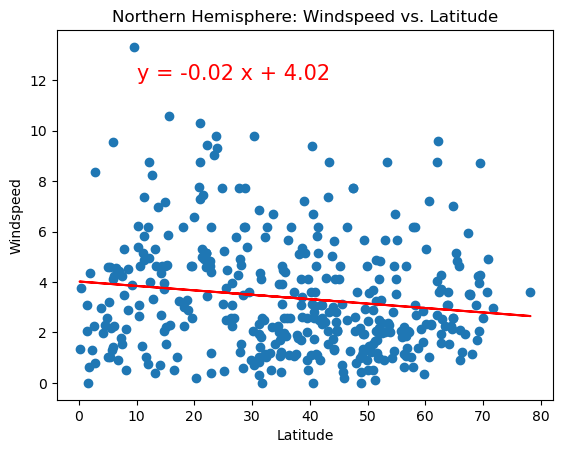

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plt.title(f"Northern Hemisphere: Windspeed vs. Latitude")
plt.ylabel("Windspeed")

plot_linear_regression(x_values,y_values, 'Latitude', (10,12))

The r^2-value is: 0.12526760770162396


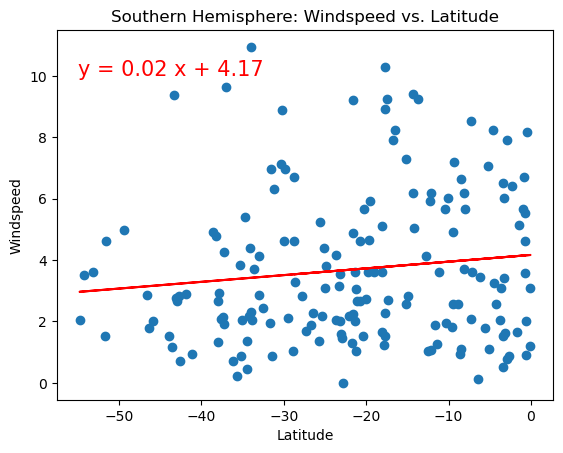

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plt.title(f"Southern Hemisphere: Windspeed vs. Latitude")
plt.ylabel("Windspeed")

plot_linear_regression(x_values,y_values, 'Latitude', (-55,10))

**Discussion about the linear relationship:** The linear regression models for both the Northern and Southern Hemispheres indicate that there is no correlation between latitude and windspeed.